In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [248]:
# PRODUCT = "STARFRUIT"
# PRODUCT = "AMETHYSTS"
# PRODUCT = "ORCHIDS"
# PRODUCT = "GIFT_BASKET"
# PRODUCT = "ROSES"
# PRODUCT = "CHOCOLATE"
# PRODUCT = "STRAWBERRIES"
# PRODUCT = "COCONUT_COUPON"
PRODUCT = "COCONUT"

In [249]:
# read json file as pandas dataframe
trades = pd.read_json("../data/trades.json")
trades.set_index('timestamp', inplace=True)
trades["costs"] = trades["price"] * trades["quantity"]
rounds = pd.read_csv("../data/rounds.csv", sep=";")
rounds_product = rounds[rounds["product"] == PRODUCT].copy()
rounds_choc = rounds[rounds["product"] == "CHOCOLATE"].copy()
rounds_straw = rounds[rounds["product"] == "STRAWBERRIES"].copy()
rounds_rose = rounds[rounds["product"] == "ROSES"].copy()


In [250]:
# add position column to trades
product_df = trades[trades['symbol'] == PRODUCT].copy()
trades_choc = trades[trades["symbol"] == "CHOCOLATE"].copy()
trades_straw = trades[trades["symbol"] == "STRAWBERRIES"].copy()
trades_rose = trades[trades["symbol"] == "ROSES"].copy()
product_df['position'] = product_df.apply(lambda row: row['quantity'] if row['buyer'] == 'SUBMISSION' else -row['quantity'] if row['seller'] == 'SUBMISSION' else 0, axis=1).copy()
product_df['position'] = product_df['position'].cumsum()



# divide trades into bought and sold
sold_product = product_df[product_df['seller'] == 'SUBMISSION']
bought_product = product_df[product_df['buyer'] == 'SUBMISSION']


# get trade volume for each day
iterations = (trades.index.max() - trades.index.min()) // 100
product_volume = product_df["quantity"].sum() / iterations

In [251]:
print(f"Trading Iterations: {iterations}")
print(f"Average {PRODUCT} Trading Volume per day: {product_volume}")

print(f"# Our daily trading volume: {(sold_product['quantity'].sum() + bought_product['quantity'].sum()) / iterations}")
print(f"# Bought: {bought_product['quantity'].sum()} for a price of average {bought_product['price'].mean()}. Total Costs: {bought_product['costs'].sum()}")
print(f"# Bought Price Range: {bought_product['price'].min()} - {bought_product['price'].max()}")
print(f"# Sold: {sold_product['quantity'].sum()} for a price of average {sold_product['price'].mean()}. Total Costs: {sold_product['costs'].sum()}")
print(f"# Sold Price Range: {sold_product['price'].min()} - {sold_product['price'].max()}")
product_quantity = bought_product['quantity'].sum() - sold_product['quantity'].sum()
product_profit = sold_product['costs'].sum() - bought_product['costs'].sum()
#TODO: put in real mid price from rounds
product_mid_price = rounds_product.iloc[-1]['mid_price']
product_profit += (product_quantity * product_mid_price)
print(f"# End day with quantity: {product_quantity}. Need to sell/buy for {product_mid_price}")
print(f"# Profit of {product_profit}")

Trading Iterations: 999
Average COCONUT Trading Volume per day: 0.8378378378378378
# Our daily trading volume: 0.3003003003003003
# Bought: 0 for a price of average nan. Total Costs: 0
# Bought Price Range: nan - nan
# Sold: 300 for a price of average 9984.4. Total Costs: 2995955
# Sold Price Range: 9980 - 9990
# End day with quantity: -300. Need to sell/buy for 9962.0
# Profit of 7355.0


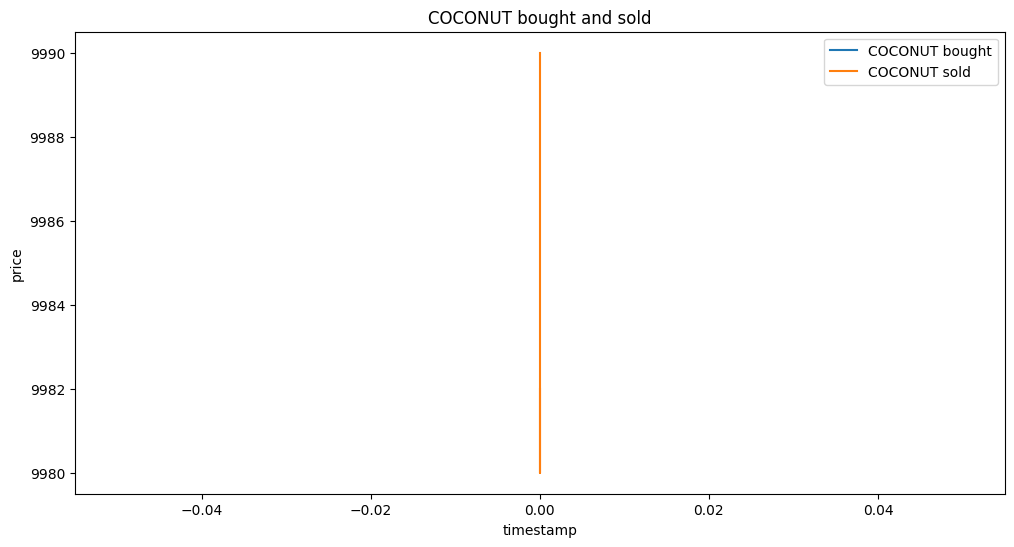

In [252]:
# draw a plot of the price by timestamp for amethysts bought and sold
plt.figure(figsize=(12, 6))
plt.plot(bought_product.index, bought_product['price'], label=f'{PRODUCT} bought')
plt.plot(sold_product.index, sold_product['price'], label=f'{PRODUCT} sold')
plt.legend()
plt.title(f'{PRODUCT} bought and sold')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.show()

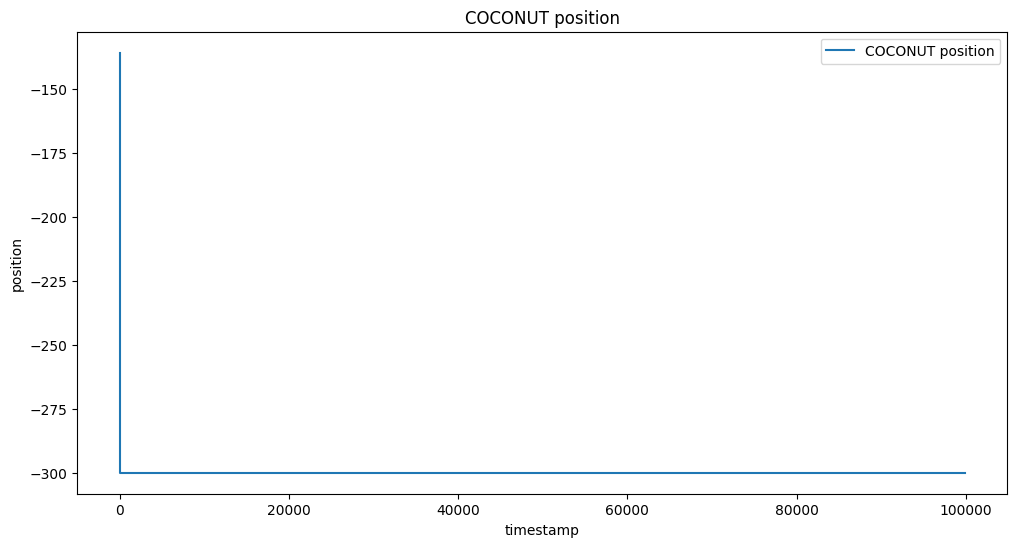

In [253]:
plt.figure(figsize=(12, 6))
plt.plot(product_df.index, product_df['position'], label=f'{PRODUCT} position')
plt.legend()
plt.title(f'{PRODUCT} position')
plt.xlabel('timestamp')
plt.ylabel('position')
plt.show()

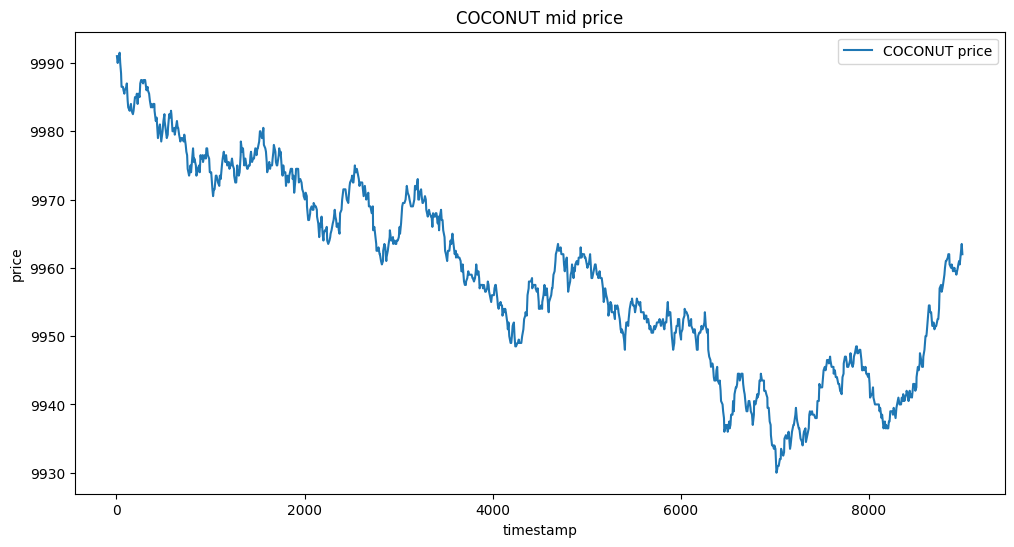

In [254]:
# plot mid price for amethysts
plt.figure(figsize=(12, 6))
plt.plot(rounds_product.index, rounds_product['mid_price'], label=f'{PRODUCT} price')
plt.legend()
plt.title(f'{PRODUCT} mid price')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.show()

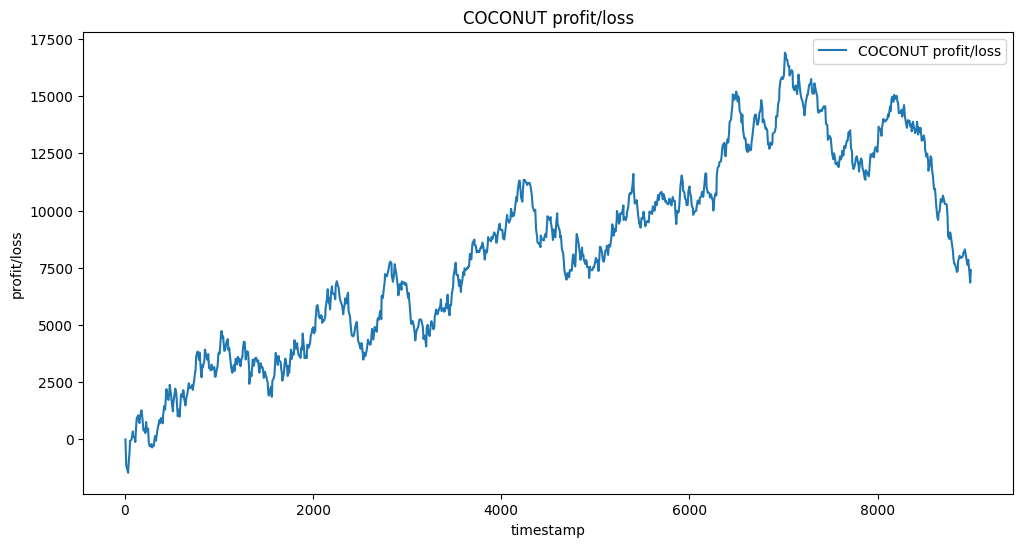

In [255]:
# plot profit/loss for each iteration for amethysts
plt.figure(figsize=(12, 6))
plt.plot(rounds_product.index, rounds_product['profit_and_loss'], label=f'{PRODUCT} profit/loss')
plt.legend()
plt.title(f'{PRODUCT} profit/loss')
plt.xlabel('timestamp')
plt.ylabel('profit/loss')
plt.show()

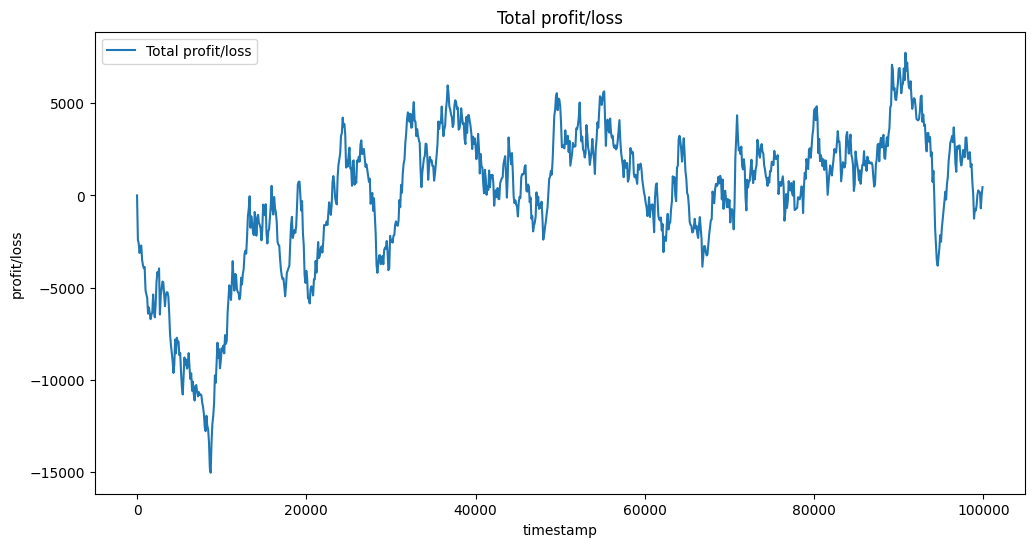

In [256]:
# compined plot of profit/loss for each iteration for starfruit and amethysts
rounds = rounds.groupby('timestamp').agg({'profit_and_loss': 'sum'})
plt.figure(figsize=(12, 6))
plt.plot(rounds.index, rounds['profit_and_loss'], label='Total profit/loss')
plt.legend()
plt.title('Total profit/loss')
plt.xlabel('timestamp')
plt.ylabel('profit/loss')
plt.show()

In [257]:
trades.head(30)

,buyer,seller,symbol,currency,price,quantity,costs
timestamp,,,,,,,
0,,SUBMISSION,CHOCOLATE,SEASHELLS,7750,4,31000
0,,SUBMISSION,CHOCOLATE,SEASHELLS,7750,4,31000
0,,SUBMISSION,CHOCOLATE,SEASHELLS,7750,4,31000
0,,SUBMISSION,CHOCOLATE,SEASHELLS,7750,4,31000
0,,SUBMISSION,CHOCOLATE,SEASHELLS,7750,4,31000
0,,SUBMISSION,CHOCOLATE,SEASHELLS,7750,4,31000
0,,SUBMISSION,CHOCOLATE,SEASHELLS,7750,4,31000
0,,SUBMISSION,CHOCOLATE,SEASHELLS,7750,4,31000
0,,SUBMISSION,CHOCOLATE,SEASHELLS,7750,4,31000
